In [29]:
import pandas as pd #importing the pandas package

In [30]:
import numpy as np #importing the numpy package

In [31]:
import matplotlib.pyplot as plt #importing the matplotlib package

In [32]:
import seaborn as sb #importing the seaborn package

In [33]:
%matplotlib inline

In [34]:
data = pd.read_csv("C:/Users/tanuj/Desktop/Subjects/DSP//Datasets//diabetes.csv") #reading the dataset

In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [37]:
data.shape

(768, 9)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


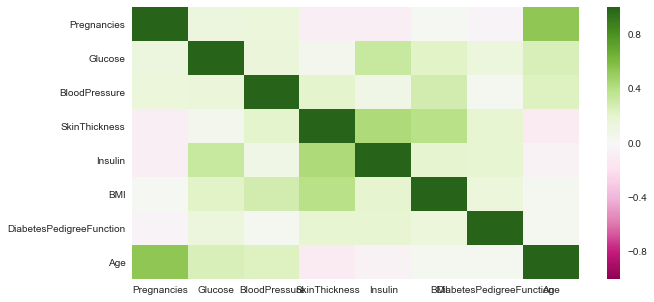

In [39]:
corr = data.corr()
plt.figure(figsize = (10,5))
sb.heatmap(corr,cmap="PiYG",
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)

Plotting the correlation matrix of data

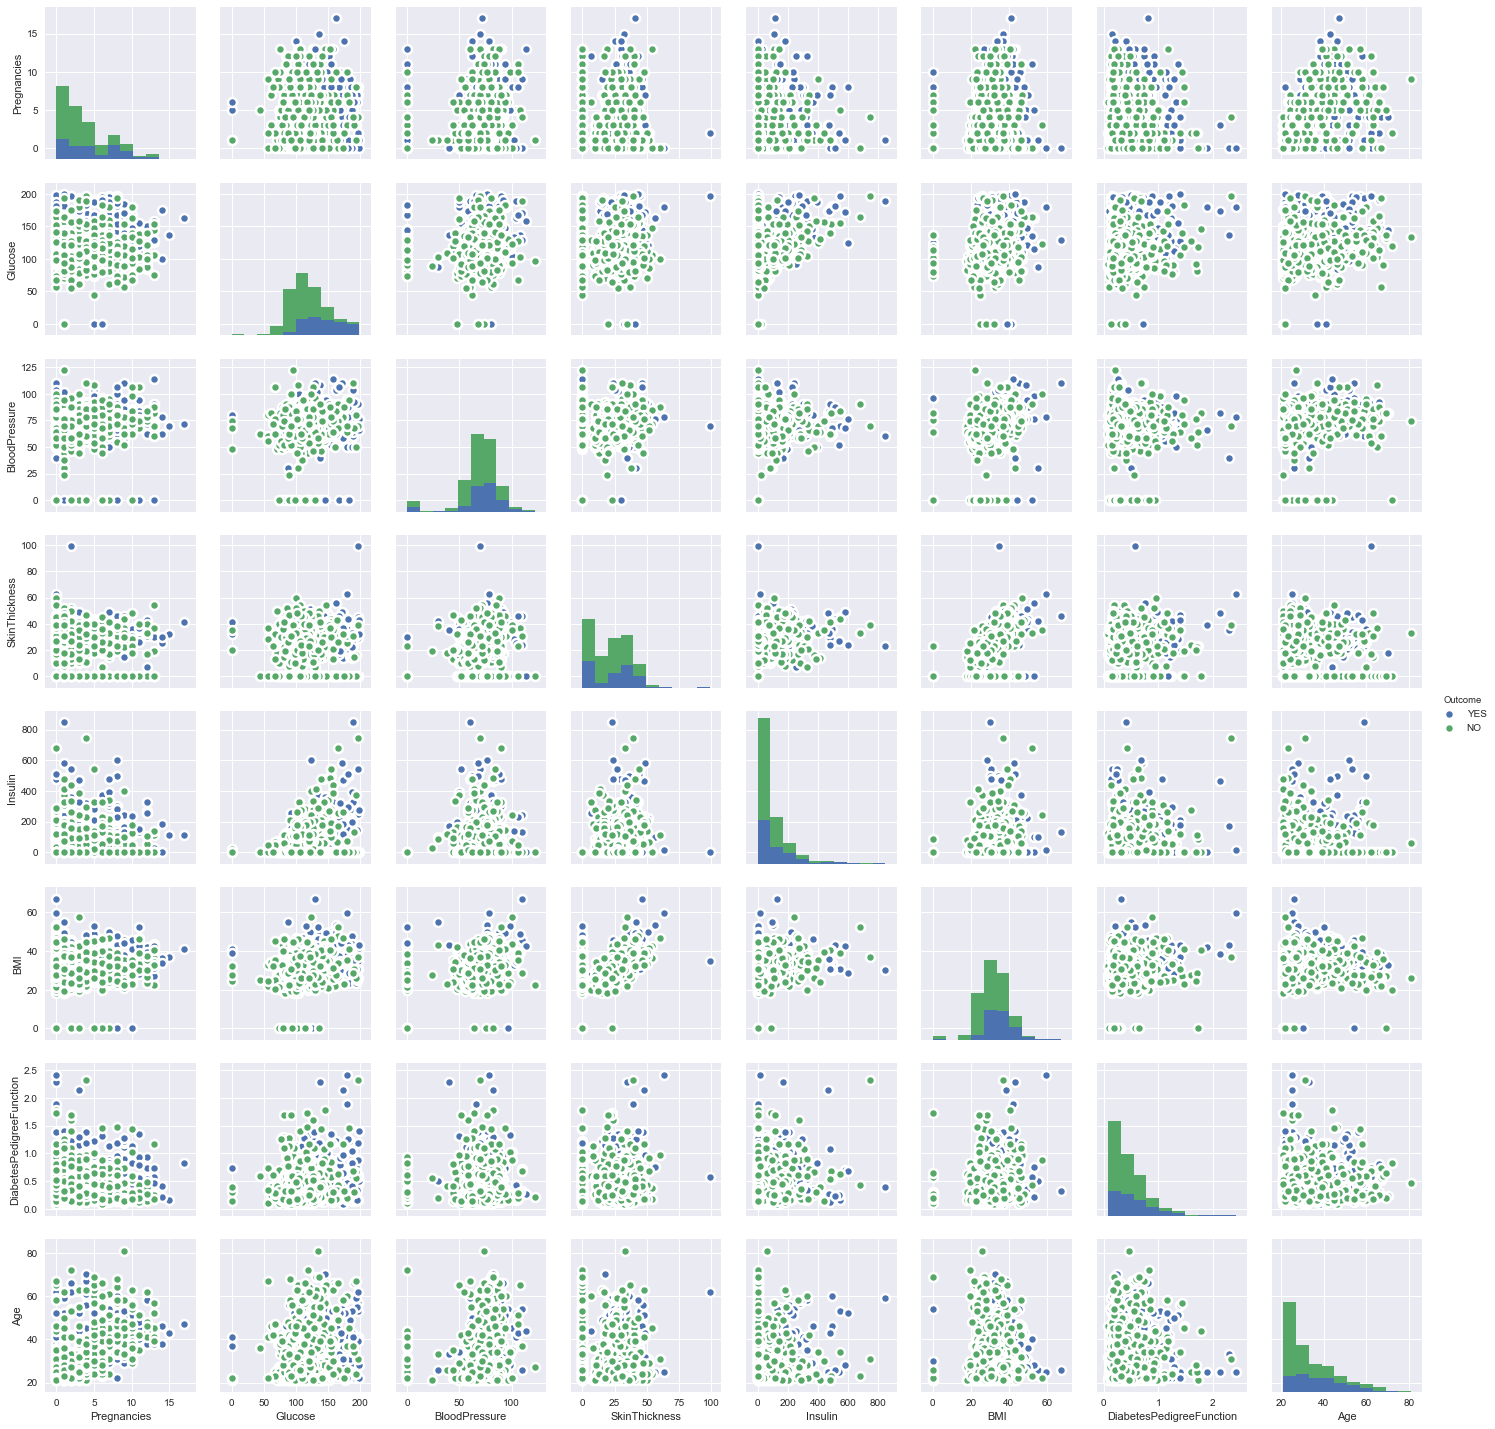

In [13]:
sb.pairplot(data, kind="scatter", hue="Outcome", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

Plotting different scatter plots of the variables. It is basically a scatterplot of variables and the diagonal is the distribution of y variable. This is a graphical representation of the correraltion matrix

In [40]:
select_cols = ["Pregnancies","Glucose","BloodPressure","Insulin","BMI","Age"]

Selecting the dependent variable ie x variables

In [41]:
x = data[select_cols] #appending the columns to the dataset

In [42]:
y= data.Outcome #Defining our Y variable which is data

In [43]:
from sklearn.model_selection import train_test_split #Importing the train and test function

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=36)

Diving the data into training and test in the 70 and 30 ratio

In [45]:
from sklearn.tree import DecisionTreeClassifier #Importing the decision tree classifier.

In [46]:
Decision_Tree= DecisionTreeClassifier()

In [47]:
Decision_Tree.fit(x_train,y_train) #Fitting the model with decision tree classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
y_pred = Decision_Tree.predict(x_test) #Predicting the values on test dataset

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #importing the confusion matrix function

In [50]:
cm = confusion_matrix(y_test,y_pred,labels=["NO","YES"]) #calculating the confusion matrix

In [51]:
cm

array([[113,  35],
       [ 37,  46]])

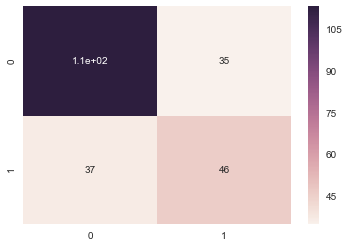

In [52]:
sb.heatmap(cm,annot=True) #Creating a heatmap of confusion matrix

In [53]:
print(classification_report(y_test,y_pred)) #Printing the classification report

             precision    recall  f1-score   support

         NO       0.75      0.76      0.76       148
        YES       0.57      0.55      0.56        83

avg / total       0.69      0.69      0.69       231



In [54]:
accuracy_score(y_test,y_pred) #Calculating the accuracy of model

0.68831168831168832

In [30]:
# Hyperparameters tunning using randomized search

1)First we will adjust the maximum depth parameter. This indicates how deep the decision tree can be. This is know as prunning the decision tree so that it does not overfit the data. We usually keep the maximum depth as 6.

2)Second we will fine tune the min_samples_fit which represents the minimum number of samples required to split an internal node. It ranges between 10% to 100%. If we increase it to 100% which is 10 then the model will underfit.

3)Thirdly we have a parameter by name min_sample_leaf this describes the minimum number of samples to be a leaf Node. IF we increase the parameter by a large extent it causes underfit of the model.

4)Max_features = The number of features to be looking for the best split
If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features

In [55]:
from scipy.stats import randint #importing the random int function

In [56]:
from  sklearn.model_selection import RandomizedSearchCV #Using radomized search for hyperparmeter search

In [58]:
param_dist = {"max_depth": [5, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

1)Maximum depth is 5 as if we increase it above 5 then there is high probability of over fitting the data.

2) Max features is the number of features we are looking to find the best split.

3) min_samples_leaf is the minimum number of samples to be a leaf node.We are giving it in a range 1 to 9.

4) The criteron which is gini_index or entropy.


In [59]:
Decision_Tree_tunning = RandomizedSearchCV(Decision_Tree,param_dist,cv=5) 
#Cv is cross validation generator
#param_dist is choosing distinct parameters

In [60]:
Decision_Tree_tunning.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D18421908>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D18421DA0>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [61]:
y_pred = Decision_Tree_tunning.predict(x_test) #predicting on testing data

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

In [63]:
cm = confusion_matrix(y_test,y_pred,labels=["NO","YES"])#creating the confusion matrix

In [64]:
cm

array([[135,  13],
       [ 47,  36]])

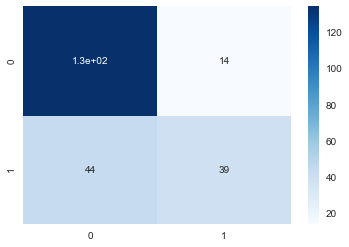

In [221]:
sb.heatmap(cm,annot=True,cmap="Blues") #Heat map of confusion matrix

In [65]:
print(classification_report(y_test,y_pred)) #Printing the classification report

             precision    recall  f1-score   support

         NO       0.74      0.91      0.82       148
        YES       0.73      0.43      0.55        83

avg / total       0.74      0.74      0.72       231



In [66]:
accuracy_score(y_test,y_pred)  #Checking the accuracy of our model

0.74025974025974028

In [67]:
print("Tuned Decision Tree Parameters: {}".format(Decision_Tree_tunning.best_params_))
#Printing out the parameters of the current search

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 7}


In [227]:
#GRADIENT BOOSTING DECISION TREE AND RANDOM FOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

In [69]:
gbmTree = GradientBoostingClassifier(max_depth=5)


In [70]:
gbmTree.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [71]:
y_pred = gbmTree.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [73]:
cm = confusion_matrix(y_test,y_pred,labels=["NO","YES"])


In [74]:
cm

array([[125,  23],
       [ 37,  46]])

In [75]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         NO       0.77      0.84      0.81       148
        YES       0.67      0.55      0.61        83

avg / total       0.73      0.74      0.73       231



In [76]:
accuracy_score(y_test,y_pred)

0.74025974025974028

RANDOM FOREST 

In [77]:
rfTree = RandomForestClassifier(max_depth=5)


In [78]:
rfTree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [79]:
y_pred = rfTree.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [81]:
cm = confusion_matrix(y_test,y_pred,labels=["NO","YES"])



In [82]:
cm

array([[134,  14],
       [ 40,  43]])

In [83]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

         NO       0.77      0.91      0.83       148
        YES       0.75      0.52      0.61        83

avg / total       0.76      0.77      0.75       231



In [84]:
accuracy_score(y_test,y_pred)

0.76623376623376627

In [245]:
#We can optimize the random forest classifier for better results as it is the best classifier which we have

References
1) http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html
2) Our text module.